In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [214]:
def Radius(X): 
    R2,R3,B,L_m,L_r,h = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    #return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    return((B/((0.99497192*R2**1.55620764*R3**(-2.77937455))*np.exp(-0.92376442*(R3-R2)/L_m)*(h**0.08060702)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.1223844))

In [220]:
Radius((180,220,1,200,150,20))

470.9689001164371

In [59]:
def MField(X,a,b,c,d,e):
    w,x,y,z = X
    R1 = (x**b)*w
    R2 = np.exp(-c/y)
    R3 = (np.tanh(d*z))+e
    R = a*(R1*R2*R3)
    return R

In [8]:
R3 = (np.tanh(0.66936258*0))+3.10786531
R3

3.10786531

In [75]:
R2 = np.arange(100,200,10)
h_gap = np.arange(20,50,10)
H_rot = np.arange(50,200,10)
L_magnet = np.arange(100,300,20)
h_fc = np.arange(10,100,10)

In [76]:
L_magnet

array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280])

In [77]:
R2 = 160
R3 = 210
R4 = 360
R5 = 360+30
L = 200

V_gap  = R3**2-R2**2
V_out = R4**2 - R3**2
V_hf = R5**2 - R4**2

X = (1.43,V_gap/V_out,L,V_hf/V_out)

In [78]:
0.13534654*1.43*(V_gap/V_out)**-0.46031427 *(np.tanh(0.66936258*(V_hf/V_out))+3.10786531)

1.2851813376510592

In [79]:
B = MField(X,0.13534654, -0.46031427, 26.03415838,  0.66936258,  3.10786531)
B

1.1283191362692808

In [80]:
R2 = 180
R3 = 220
L = 200
R_5 = 500
R_4 = np.arange(221,R_5,1)
h = R_5 - R_4

for i in range(len(R_4)):
    B[i] = MField((1.43,V_gap/V_out[i],L,V_hf[i]/V_out[i]),0.13534654, -0.46031427, 26.03415838,  0.66936258,  3.10786531)

TypeError: 'int' object is not subscriptable

In [169]:
def MagField(X,a,b,c,d,e,f):
    R2,R3,R4,h,L,B_rem = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(h**f))

In [170]:
def MField(X,a,b,c,d,e):
    V_gap,V_mag,V_out,L,B_rem,R_4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R_4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [176]:
def MField_2(X,a,b,c,d,e,f,g):
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [196]:
R2 = 200
R3 = 230
L = 200
h = np.arange(10,41,1)
R_5 = 400*np.ones(len(h))
R_4 = R_5 - h



#R_4 = 350*np.ones(len(h))
#h = np.arange(10,41,1)
#R_5 = R_4 + h
#V_gap  = R3**2-R2**2
#V_out = R_4**2 - R3**2
#V_hf = R_5**2 - R_4**2


B = np.zeros(len(R_4))
B1 = np.zeros(len(R_4))
B2 = np.zeros(len(R_4))


for i in range(len(R_4)):
    B[i]  = MagField((R2,R3,R_4[i],h[i],L,1.43),1.21942137,  2.12682945, -3.59056376,  1.32273009, -0.88523986,0.07976582)
    B1[i] = MField((R3**2-R2**2,R_4[i]**2-R3**2,R_5[i]**2-R_4[i]**2,L,1.43,R_4[i]), 0.11275628, -0.55433261, -0.08821461,  1.10411026,  3.04308004)
    B2[i] = MField_2((R2,R3,R_4[i],L,1.43,R_5[i]),7.6350629 ,  2.05485415, -3.60881333,  1.5332548 , -0.90315524,0.03254254,  0.08822238)

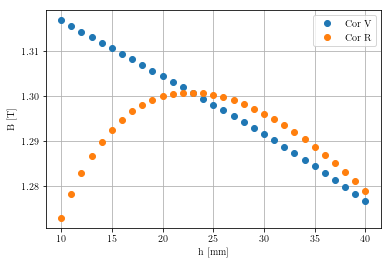

In [197]:
plt.plot(h,B1,'o',label = 'Cor V')
plt.plot(h,B,'o',label = 'Cor R' )
plt.legend()
plt.xlabel('h [mm]')
plt.ylabel('B [T]')
#plt.plot(h,B2,'o')
plt.grid()
plt.savefig('Dif_R5_fixo.png', format = 'png', dpi = 1000, bbox_inches = 'tight')

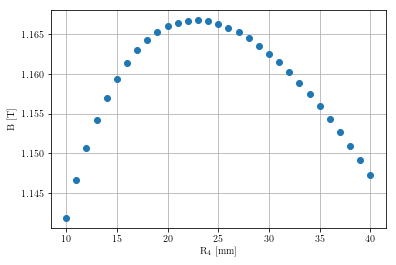

In [183]:
plt.plot(h,B,'o')
plt.grid()
plt.xlabel('R$_4$ [mm]')
plt.ylabel('B [T]')
plt.savefig('Capa.png',format = 'png', dpi=500,bbox_inches='tight')

In [20]:
B = []
R_2 = []
R_3 = []
R_4 = []
R_5 = []
L_m = []

n = 0

for i in range(len(R2)):
    for j in range(len(h_gap)):
        for k in range(len(H_rot)):
            for l in range(len(L_magnet)):
                for m in range(len(h_fc)):
                    R_2.append(R2[i])
                    R_3.append(R2[i]+h_gap[j])
                    R_4.append(R2[i]+h_gap[j]+H_rot[k])
                    R_5.append(R2[i]+h_gap[j]+H_rot[k]+h_fc[m])
                    L_m.append(L_magnet[l])
                    V_gap = ((R2[i]+h_gap[j])**2 - (R2[i])**2)
                    V_out = ((R2[i]+h_gap[j]+H_rot[k])**2 - (R2[i]+h_gap[j])**2)
                    V_rot = ((R2[i]+h_gap[j]+H_rot[k]+h_fc[m])**2 - (R2[i]+h_gap[j]+H_rot[k])**2)
                    X = ([1.43,V_gap/V_out,L_magnet,V_rot/V_out])
                    
                    B_mag = MField(X,0.13534654, -0.46031427, 26.03415838,  0.66936258,  3.10786531)
                    
                    B.append(B_mag)

In [69]:
V_rotor = (np.array(R_4)**2 - np.array(R_3)**2)*np.array(L_m)*10**-9
V_outter = (np.array(R_5)**2 - np.array(R_4)**2)*np.array(L_m)*10**-9
V_t = (np.array(R_5)**2-np.array(R_3)**2+np.array(R_2)**2)*np.array(L_m)*10**-9

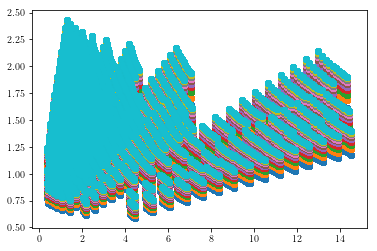

In [71]:
plt.plot(V_rotor/V_outter,B,'o')

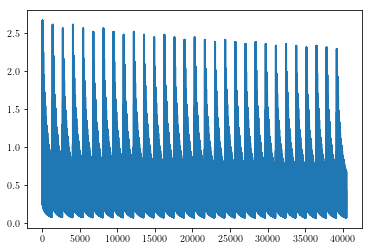

In [79]:
plt.plot(V_outter/V_rotor)

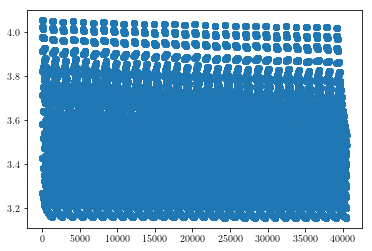

In [78]:
plt.plot(np.tanh(0.66936258*(V_outter/V_rotor))+3.10786531,'o')

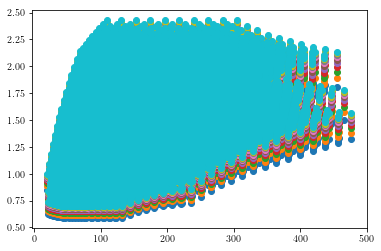

In [53]:
plt.plot((np.array(R_5)**2-np.array(R_3)**2+np.array(R_2)**2)*np.array(L_m)*10**-9*7000,B,'o')

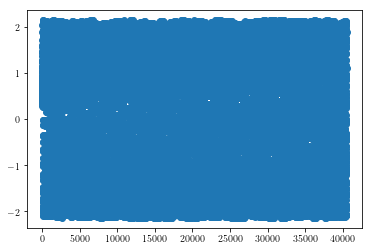

In [45]:
plt.plot(V,'o')

In [148]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return( 0.44774473*P1+0.69113695*P2-0.46543184*P3+0.02740828*P4-1.2412753 *P5)
    #return(0.271043*P1+0.49653155*P2-0.28565907*P3+1*P4-1.13502211*P5)
    return(0.66679759*P1+  0.8505155*P2 -0.6893551*P3 -0.94156247*P4-0.34938015*P5)

In [149]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    #return(0.46673225*P1+1.40322589*P2-0.49908018*P3+0.01575257*P4-0.68914607*P5)
    #return(0.36735687*P1+1*P2-0.38713269*P3+1*P4-0.21881993*P5)
    return(0.77855664*P1+ 1.44966907*P2 -0.80985607*P3+ 0.39133248*P4+  0.65808892*P5)

In [62]:
def W_m(X):
    P1,P2,P3 = X
    #a = 0.00541105
    #a = 0.00937193
    a = 2.89392107e-03
    
    #b = -2.21029128
    #b = -0.99809109
    b = -3.14070133e+00
    
    #c = 2.84461382
    #c = 4.33008264
    c = 3.20699560e+00
    
    #d = 2.85861479
    #d = 1.61088792
    d = 3.81307556e+00
    
    return(a*P1**b*P2**c*P3**d )

In [63]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [64]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [65]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_ma = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]


Calculation

In [160]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt,h_f):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    
    t_h = 4
    t_w = 2.5
    N_reg = 4/FE
    
    #Regenerador Quadrad
    R2 = [W/2+t_w]/np.tan(np.pi/N_reg)-t_h
    R3 = np.sqrt((W/2)**2 + (R2+t_h+H)**2)+t_h
    
   
    
    #R_aux = np.sqrt((R2+t_h)**2-(W/2)**2)
    #R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    #Regenerador Circular
    
    #R_med = (4/FE)/(2*np.pi)*(W + 2*t_w)
    #R2 = R_med-(H/2+t_h)
    #R3 = R_med+(H/2+t_h)
    
    A_st = H*W
    #A_aux_st = np.pi/(4/FE)*((R3-t_h)**2-(R2+t_h)**2)
    #A_st = A_aux_st[0]
    

    m_s   = L*A_st*10**-9*(1-Epsilon)*rho_s #mass of the AMR

    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*A_st*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon_dp)/Epsilon_dp)+((1-Epsilon_dp)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*A_st*10**(-9))/(m_f*c_f) 
    #print(Re_dp)
    dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    
    #dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##
    Pi_4 = CdT_mg/CdT_dmg
    Pi_6 = ((m_f)*c_f)/(m_s*C_L*f)
    Pi_11 = ((m_f)*c_f)/(m_s*C_H*f)
    
    
    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_mag = m_s*f*CdT_dmg*W_m((Pi_6,Pi_4,Pi_11))
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L,h_f))
    

    
    #print(m_s,f,CdT_dmg,((Pi_6,Pi_4,Pi_11)))
    

    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL)

In [145]:
Epsilon = 0.55 #0.55  #[-] Porosity
Epsilon_dp = Epsilon - 0.09 #0.36 #0.465 #[-] Porosity
d_ph = Epsilon_dp/(1-Epsilon_dp)*d_p

A = Optimal(800/3600,0.25,3,160,30,60,1.3,22+273.15,35+273.15,10+273.15,43+273.15,0.3,20)
A[0]/16

101.19409026512852
[7388.56269131] 682.8446039255555 7665.166666666666 49.38931233800671 7.667841860431203


array([160.05880252])

Qc_rg = []
Qh_rg = []
W_pump_rg =[]
ECr_c = []
ECr_h = []
N_r = []
R2 = []
R3 = []
R4 = []

for i in range(len(L)):                          
    A1,A2,A3,A4,A5,A6,A7,A8,A9 = Optimal(m_f[i],0.25,f[i],L[i],H[i],W[i],B[i],22+273.15,35+273.15,T_c[i],T_h[i])
    Qc_rg.append(A1)
    Qh_rg.append(A9)
    W_pump_rg.append(A8)
    ECr_c.append(A2)
    ECr_h.append(A3)
    N_r.append(A6)
    R2.append(A6)
    R3.append(A5)
    R4.append(A4)

tan(Theta/2)
R2

W = 40
H = 20
A1 = W*H
t_w = 2
t_h = 2
Theta = 2*np.pi/16


R2 = (W/2)/np.tan(Theta/2)
R3 = np.sqrt((W/2)**2 + (R2+H)**2)    
A2 = (np.pi/16)*(R3**2-R2**2)



In [133]:
def A_ratio(W,H):
    A1 = W*H
    t_w = 2
    t_h = 2
    Theta = 2*np.pi/16
    
    
    R2 = (W/2)/np.tan(Theta/2)
    R3 = np.sqrt((W/2)**2 + (R2+H)**2)    
    A2 = (np.pi/16)*(R3**2-R2**2)
    
    return(A1/A2)

In [122]:
H = np.arange(10,60,1)
W = np.arange(30,80,1)
R_a = np.zeros([len(H),len(W)])
for i in range(len(H)):
    for j in range(len(W)):
        R_a[i][j] = A_ratio(W[j],H[i])

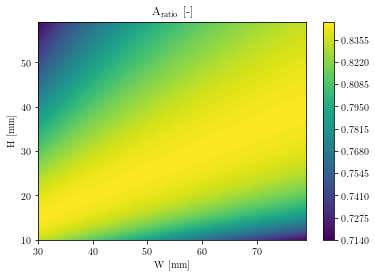

In [123]:
plt.contourf(W,H,R_a,100)
plt.colorbar()
plt.xlabel('W [mm]')
plt.ylabel('H [mm]')
plt.title('A$_\mathrm{ratio}$ [-]')
#plt.xlim([50,80])
#plt.ylim([25,45])
plt.savefig('Aratio.png',format = 'png', dpi=500,bbox_inches='tight')

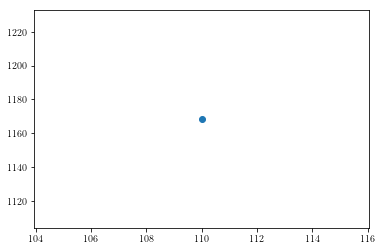

In [124]:
plt.plot(L_p,m_p,'o')

In [192]:
m_f = np.arange(650,1200,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1,1.1,1)
L = np.arange(120,160,5)
H = np.arange(30,60,5)
W = np.arange(40,75,5)
B_max = np.arange(1.2,1.43,0.05)
Tce = np.arange(14,17,4)
The = np.arange(43,45,4)
L_xt = np.arange(0.15,0.45,0.05)
d_par = np.arange(500*10**-6,501*10**-6,100*10**-6)
#d_par = [500*10**-6]

m_f = np.arange(800,801,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1.5,1.9,0.5)
L = np.arange(150,159,10)
H = np.arange(50,51,5)
W = np.arange(60,61,5)
B_max = np.arange(1.3,1.34,0.05)
Tce = np.arange(14,15,2)
The = np.arange(42,43,2)
L_xt = np.arange(0.5,0.6,0.2)

In [193]:
Epsilon = 0.55 #0.55  #[-] Porosity
Epsilon_dp = Epsilon - 0.09 #0.36 #0.465 #[-] Porosity
d_ph = Epsilon_dp/(1-Epsilon_dp)*d_p

A = Optimal(800/3600,0.25,3,160,30,60,1.3,22+273.15,35+273.15,10+273.15,43+273.15,0.3,20)
A[0]/16

array([160.05880252])

In [194]:
d_p

0.0005

(Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL)

In [195]:

[6438.07171695] 673.0173213744445 6736.055555555555 -580.7984608854367 19.90084121294288

SyntaxError: invalid syntax (<ipython-input-195-98dfb2bf6034>, line 2)

In [196]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)

11760

m_f = 600/3600
FE = 0.25
f = 2.25
L = 140
H = 20
W = 60
B_max = 1.5
T_c  = 22
T_h = 35
Tce = 14
The = 43

A = Optimal(m_f,FE,f,L,H,W,B_max,T_c+273.15,T_h+273.15,Tce+273.15,The+273.15,L_xt)
A[0][0]/16

In [197]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 3100

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []
dp_target = []

##Properties of the solid 
rho_s = 7900  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium


#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    for r in range(len(d_par)):
                                        it = 0
                                        Q_c_system = 0
                                        
                                        d_p = d_par[r] #[m] Particle diameter

                                        Epsilon = 0.5 #0.55  #[-] Porosity
                                        Epsilon_dp = Epsilon - 0.09 #0.36 #0.465 #[-] Porosity
                                        d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
                                        h_f = 20
                                        
                                        while Q_c_system < Q_c_target and it < len(m_f):
                                            A,B,C,D,E,F,G,A1,A2,A3,A4 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q],h_f)
                                            Q_c_system = A[0]
                                            it = it + 1
                                            #print(A,B,C,D,E,F,G,A1,A2,A3)
                                            #print(m_f[it-1]*3600,Q_c_system )
                                        #print(it,Q_c_system)
                                        if Q_c_system > Q_c_target:
                                            Q_c.append(Q_c_system)
                                            m_f_target.append(3600*m_f[it-1])
                                            FE_target.append(FE[i])
                                            f_target.append(f[j])
                                            L_target.append(L[k])
                                            H_target.append(H[l])
                                            W_target.append(W[m])
                                            Tce_target.append(Tce[n])
                                            The_target.append(The[o])
                                            B_target.append(B_max[p])
                                            dp_target.append(d_p)
                                            ECr_c.append(B[0])
                                            ECr_h.append(C[0])
                                            R4.append(D[0])
                                            R3.append(E[0])
                                            R2.append(F[0])
                                            W_mag.append(G)
                                            W_pump.append(A1)
                                            Q_h.append(A2[0])
                                            L_xt_target.append(A3)
                                            FL_target.append(A4)

                                        cont = cont+1
                                        print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)))
                            

0.008503401360544218
0.017006802721088437
0.025510204081632654
0.034013605442176874
0.04251700680272109
0.05102040816326531
0.05952380952380952
0.06802721088435375
0.07653061224489796
0.08503401360544217
0.0935374149659864
0.10204081632653061
0.11054421768707483
0.11904761904761904
0.12755102040816327
0.1360544217687075
0.1445578231292517
0.15306122448979592
0.16156462585034015
0.17006802721088435
0.17857142857142858
0.1870748299319728
0.195578231292517
0.20408163265306123
0.21258503401360543
0.22108843537414966
0.22959183673469388
0.23809523809523808
0.2465986394557823
0.25510204081632654
0.26360544217687076
0.272108843537415
0.28061224489795916
0.2891156462585034
0.2976190476190476
0.30612244897959184
0.31462585034013607
0.3231292517006803
0.33163265306122447
0.3401360544217687
0.3486394557823129
0.35714285714285715
0.3656462585034014
0.3741496598639456
0.3826530612244898
0.391156462585034
0.39965986394557823
0.40816326530612246
0.4166666666666667
0.42517006802721086
0.43367346938775

3.8095238095238093
3.818027210884354
3.826530612244898
3.8350340136054424
3.8435374149659864
3.8520408163265305
3.860544217687075
3.869047619047619
3.877551020408163
3.8860544217687076
3.8945578231292517
3.9030612244897958
3.9115646258503403
3.9200680272108843
3.9285714285714284
3.937074829931973
3.945578231292517
3.954081632653061
3.9625850340136055
3.9710884353741496
3.979591836734694
3.988095238095238
3.996598639455782
4.005102040816326
4.01360544217687
4.022108843537415
4.030612244897959
4.039115646258503
4.0476190476190474
4.0561224489795915
4.0646258503401365
4.0731292517006805
4.081632653061225
4.090136054421769
4.098639455782313
4.107142857142857
4.115646258503402
4.124149659863946
4.13265306122449
4.141156462585034
4.149659863945578
4.158163265306122
4.166666666666667
4.175170068027211
4.183673469387755
4.192176870748299
4.200680272108843
4.209183673469388
4.217687074829932
4.226190476190476
4.23469387755102
4.243197278911564
4.2517006802721085
4.260204081632653
4.268707482993

7.772108843537415
7.780612244897959
7.789115646258503
7.7976190476190474
7.8061224489795915
7.8146258503401365
7.8231292517006805
7.831632653061225
7.840136054421769
7.848639455782313
7.857142857142857
7.865646258503402
7.874149659863946
7.88265306122449
7.891156462585034
7.899659863945578
7.908163265306122
7.916666666666667
7.925170068027211
7.933673469387755
7.942176870748299
7.950680272108843
7.959183673469388
7.967687074829932
7.976190476190476
7.98469387755102
7.993197278911564
8.001700680272108
8.010204081632653
8.018707482993197
8.02721088435374
8.035714285714286
8.04421768707483
8.052721088435375
8.061224489795919
8.069727891156463
8.078231292517007
8.08673469387755
8.095238095238095
8.103741496598639
8.112244897959183
8.120748299319727
8.129251700680273
8.137755102040817
8.146258503401361
8.154761904761905
8.16326530612245
8.171768707482993
8.180272108843537
8.188775510204081
8.197278911564625
8.20578231292517
8.214285714285714
8.22278911564626
8.231292517006803
8.239795918367

12.508503401360544
12.517006802721088
12.525510204081632
12.534013605442176
12.54251700680272
12.551020408163266
12.55952380952381
12.568027210884354
12.576530612244898
12.585034013605442
12.593537414965986
12.60204081632653
12.610544217687075
12.619047619047619
12.627551020408163
12.636054421768707
12.644557823129253
12.653061224489797
12.66156462585034
12.670068027210885
12.678571428571429
12.687074829931973
12.695578231292517
12.704081632653061
12.712585034013605
12.72108843537415
12.729591836734693
12.738095238095237
12.746598639455783
12.755102040816327
12.763605442176871
12.772108843537415
12.78061224489796
12.789115646258503
12.797619047619047
12.806122448979592
12.814625850340136
12.82312925170068
12.831632653061224
12.84013605442177
12.848639455782314
12.857142857142858
12.865646258503402
12.874149659863946
12.88265306122449
12.891156462585034
12.899659863945578
12.908163265306122
12.916666666666666
12.92517006802721
12.933673469387756
12.9421768707483
12.950680272108844
12.95

16.301020408163264
16.30952380952381
16.318027210884352
16.3265306122449
16.33503401360544
16.343537414965986
16.352040816326532
16.360544217687075
16.36904761904762
16.377551020408163
16.38605442176871
16.39455782312925
16.403061224489797
16.41156462585034
16.420068027210885
16.428571428571427
16.437074829931973
16.44557823129252
16.45408163265306
16.462585034013607
16.47108843537415
16.479591836734695
16.488095238095237
16.496598639455783
16.505102040816325
16.51360544217687
16.522108843537413
16.53061224489796
16.539115646258505
16.547619047619047
16.556122448979593
16.564625850340136
16.57312925170068
16.581632653061224
16.59013605442177
16.598639455782312
16.607142857142858
16.6156462585034
16.624149659863946
16.632653061224488
16.641156462585034
16.64965986394558
16.658163265306122
16.666666666666668
16.67517006802721
16.683673469387756
16.6921768707483
16.700680272108844
16.709183673469386
16.717687074829932
16.726190476190474
16.73469387755102
16.743197278911566
16.751700680272

20.127551020408163
20.13605442176871
20.14455782312925
20.153061224489797
20.16156462585034
20.170068027210885
20.178571428571427
20.187074829931973
20.19557823129252
20.20408163265306
20.212585034013607
20.22108843537415
20.229591836734695
20.238095238095237
20.246598639455783
20.255102040816325
20.26360544217687
20.272108843537413
20.28061224489796
20.289115646258505
20.297619047619047
20.306122448979593
20.314625850340136
20.32312925170068
20.331632653061224
20.34013605442177
20.348639455782312
20.357142857142858
20.3656462585034
20.374149659863946
20.382653061224488
20.391156462585034
20.39965986394558
20.408163265306122
20.416666666666668
20.42517006802721
20.433673469387756
20.4421768707483
20.450680272108844
20.459183673469386
20.467687074829932
20.476190476190474
20.48469387755102
20.493197278911566
20.50170068027211
20.510204081632654
20.518707482993197
20.527210884353742
20.535714285714285
20.54421768707483
20.552721088435373
20.56122448979592
20.56972789115646
20.57823129251

24.94047619047619
24.948979591836736
24.957482993197278
24.965986394557824
24.974489795918366
24.982993197278912
24.991496598639454
25.0
25.008503401360546
25.017006802721088
25.025510204081634
25.034013605442176
25.042517006802722
25.051020408163264
25.05952380952381
25.068027210884352
25.0765306122449
25.08503401360544
25.093537414965986
25.102040816326532
25.110544217687075
25.11904761904762
25.127551020408163
25.13605442176871
25.14455782312925
25.153061224489797
25.16156462585034
25.170068027210885
25.178571428571427
25.187074829931973
25.19557823129252
25.20408163265306
25.212585034013607
25.22108843537415
25.229591836734695
25.238095238095237
25.246598639455783
25.255102040816325
25.26360544217687
25.272108843537413
25.28061224489796
25.289115646258505
25.297619047619047
25.306122448979593
25.314625850340136
25.32312925170068
25.331632653061224
25.34013605442177
25.348639455782312
25.357142857142858
25.3656462585034
25.374149659863946
25.382653061224488
25.391156462585034
25.399

28.784013605442176
28.792517006802722
28.801020408163264
28.80952380952381
28.818027210884352
28.8265306122449
28.83503401360544
28.843537414965986
28.852040816326532
28.860544217687075
28.86904761904762
28.877551020408163
28.88605442176871
28.89455782312925
28.903061224489797
28.91156462585034
28.920068027210885
28.928571428571427
28.937074829931973
28.94557823129252
28.95408163265306
28.962585034013607
28.97108843537415
28.979591836734695
28.988095238095237
28.996598639455783
29.005102040816325
29.01360544217687
29.022108843537413
29.03061224489796
29.039115646258505
29.047619047619047
29.056122448979593
29.064625850340136
29.07312925170068
29.081632653061224
29.09013605442177
29.098639455782312
29.107142857142858
29.1156462585034
29.124149659863946
29.132653061224488
29.141156462585034
29.14965986394558
29.158163265306122
29.166666666666668
29.17517006802721
29.183673469387756
29.1921768707483
29.200680272108844
29.209183673469386
29.217687074829932
29.226190476190474
29.23469387755

33.256802721088434
33.265306122448976
33.273809523809526
33.28231292517007
33.29081632653061
33.29931972789116
33.3078231292517
33.316326530612244
33.324829931972786
33.333333333333336
33.34183673469388
33.35034013605442
33.35884353741496
33.36734693877551
33.375850340136054
33.3843537414966
33.392857142857146
33.40136054421769
33.40986394557823
33.41836734693877
33.42687074829932
33.435374149659864
33.44387755102041
33.45238095238095
33.4608843537415
33.46938775510204
33.47789115646258
33.48639455782313
33.494897959183675
33.50340136054422
33.51190476190476
33.52040816326531
33.52891156462585
33.53741496598639
33.545918367346935
33.554421768707485
33.56292517006803
33.57142857142857
33.57993197278912
33.58843537414966
33.5969387755102
33.605442176870746
33.613945578231295
33.62244897959184
33.63095238095238
33.63945578231292
33.64795918367347
33.656462585034014
33.664965986394556
33.673469387755105
33.68197278911565
33.69047619047619
33.69897959183673
33.70748299319728
33.715986394557

37.534013605442176
37.54251700680272
37.55102040816327
37.55952380952381
37.56802721088435
37.576530612244895
37.585034013605444
37.593537414965986
37.60204081632653
37.61054421768708
37.61904761904762
37.62755102040816
37.636054421768705
37.644557823129254
37.6530612244898
37.66156462585034
37.67006802721088
37.67857142857143
37.68707482993197
37.695578231292515
37.704081632653065
37.71258503401361
37.72108843537415
37.72959183673469
37.73809523809524
37.74659863945578
37.755102040816325
37.76360544217687
37.77210884353742
37.78061224489796
37.7891156462585
37.79761904761905
37.80612244897959
37.814625850340136
37.82312925170068
37.83163265306123
37.84013605442177
37.84863945578231
37.857142857142854
37.8656462585034
37.874149659863946
37.88265306122449
37.89115646258504
37.89965986394558
37.90816326530612
37.916666666666664
37.925170068027214
37.933673469387756
37.9421768707483
37.95068027210884
37.95918367346939
37.96768707482993
37.976190476190474
37.984693877551024
37.993197278911

41.47959183673469
41.48809523809524
41.49659863945578
41.505102040816325
41.51360544217687
41.52210884353742
41.53061224489796
41.5391156462585
41.54761904761905
41.55612244897959
41.564625850340136
41.57312925170068
41.58163265306123
41.59013605442177
41.59863945578231
41.607142857142854
41.6156462585034
41.624149659863946
41.63265306122449
41.64115646258504
41.64965986394558
41.65816326530612
41.666666666666664
41.675170068027214
41.683673469387756
41.6921768707483
41.70068027210884
41.70918367346939
41.71768707482993
41.726190476190474
41.734693877551024
41.743197278911566
41.75170068027211
41.76020408163265
41.7687074829932
41.77721088435374
41.785714285714285
41.79421768707483
41.802721088435376
41.81122448979592
41.81972789115646
41.82823129251701
41.83673469387755
41.845238095238095
41.85374149659864
41.86224489795919
41.87074829931973
41.87925170068027
41.88775510204081
41.89625850340136
41.904761904761905
41.91326530612245
41.92176870748299
41.93027210884354
41.93877551020408


45.92687074829932
45.935374149659864
45.94387755102041
45.95238095238095
45.9608843537415
45.96938775510204
45.97789115646258
45.98639455782313
45.994897959183675
46.00340136054422
46.01190476190476
46.02040816326531
46.02891156462585
46.03741496598639
46.045918367346935
46.054421768707485
46.06292517006803
46.07142857142857
46.07993197278912
46.08843537414966
46.0969387755102
46.105442176870746
46.113945578231295
46.12244897959184
46.13095238095238
46.13945578231292
46.14795918367347
46.156462585034014
46.164965986394556
46.173469387755105
46.18197278911565
46.19047619047619
46.19897959183673
46.20748299319728
46.215986394557824
46.224489795918366
46.23299319727891
46.24149659863946
46.25
46.25850340136054
46.26700680272109
46.275510204081634
46.284013605442176
46.29251700680272
46.30102040816327
46.30952380952381
46.31802721088435
46.326530612244895
46.335034013605444
46.343537414965986
46.35204081632653
46.36054421768708
46.36904761904762
46.37755102040816
46.386054421768705
46.3945

50.05952380952381
50.06802721088435
50.076530612244895
50.085034013605444
50.093537414965986
50.10204081632653
50.11054421768708
50.11904761904762
50.12755102040816
50.136054421768705
50.144557823129254
50.1530612244898
50.16156462585034
50.17006802721088
50.17857142857143
50.18707482993197
50.195578231292515
50.204081632653065
50.21258503401361
50.22108843537415
50.22959183673469
50.23809523809524
50.24659863945578
50.255102040816325
50.26360544217687
50.27210884353742
50.28061224489796
50.2891156462585
50.29761904761905
50.30612244897959
50.314625850340136
50.32312925170068
50.33163265306123
50.34013605442177
50.34863945578231
50.357142857142854
50.3656462585034
50.374149659863946
50.38265306122449
50.39115646258504
50.39965986394558
50.40816326530612
50.416666666666664
50.425170068027214
50.433673469387756
50.4421768707483
50.45068027210884
50.45918367346939
50.46768707482993
50.476190476190474
50.484693877551024
50.493197278911566
50.50170068027211
50.51020408163265
50.518707482993

53.91156462585034
53.92006802721088
53.92857142857143
53.93707482993197
53.945578231292515
53.954081632653065
53.96258503401361
53.97108843537415
53.97959183673469
53.98809523809524
53.99659863945578
54.005102040816325
54.01360544217687
54.02210884353742
54.03061224489796
54.0391156462585
54.04761904761905
54.05612244897959
54.064625850340136
54.07312925170068
54.08163265306123
54.09013605442177
54.09863945578231
54.107142857142854
54.1156462585034
54.124149659863946
54.13265306122449
54.14115646258504
54.14965986394558
54.15816326530612
54.166666666666664
54.175170068027214
54.183673469387756
54.1921768707483
54.20068027210884
54.20918367346939
54.21768707482993
54.226190476190474
54.234693877551024
54.243197278911566
54.25170068027211
54.26020408163265
54.2687074829932
54.27721088435374
54.285714285714285
54.29421768707483
54.302721088435376
54.31122448979592
54.31972789115646
54.32823129251701
54.33673469387755
54.345238095238095
54.35374149659864
54.36224489795919
54.37074829931973

58.35034013605442
58.35884353741496
58.36734693877551
58.375850340136054
58.3843537414966
58.392857142857146
58.40136054421769
58.40986394557823
58.41836734693877
58.42687074829932
58.435374149659864
58.44387755102041
58.45238095238095
58.4608843537415
58.46938775510204
58.47789115646258
58.48639455782313
58.494897959183675
58.50340136054422
58.51190476190476
58.52040816326531
58.52891156462585
58.53741496598639
58.545918367346935
58.554421768707485
58.56292517006803
58.57142857142857
58.57993197278912
58.58843537414966
58.5969387755102
58.605442176870746
58.613945578231295
58.62244897959184
58.63095238095238
58.63945578231292
58.64795918367347
58.656462585034014
58.664965986394556
58.673469387755105
58.68197278911565
58.69047619047619
58.69897959183673
58.70748299319728
58.715986394557824
58.724489795918366
58.73299319727891
58.74149659863946
58.75
58.75850340136054
58.76700680272109
58.775510204081634
58.784013605442176
58.79251700680272
58.80102040816327
58.80952380952381
58.8180272

62.56802721088435
62.576530612244895
62.585034013605444
62.593537414965986
62.60204081632653
62.61054421768708
62.61904761904762
62.62755102040816
62.636054421768705
62.644557823129254
62.6530612244898
62.66156462585034
62.67006802721088
62.67857142857143
62.68707482993197
62.695578231292515
62.704081632653065
62.71258503401361
62.72108843537415
62.72959183673469
62.73809523809524
62.74659863945578
62.755102040816325
62.76360544217687
62.77210884353742
62.78061224489796
62.7891156462585
62.79761904761905
62.80612244897959
62.814625850340136
62.82312925170068
62.83163265306123
62.84013605442177
62.84863945578231
62.857142857142854
62.8656462585034
62.874149659863946
62.88265306122449
62.89115646258504
62.89965986394558
62.90816326530612
62.916666666666664
62.925170068027214
62.933673469387756
62.9421768707483
62.95068027210884
62.95918367346939
62.96768707482993
62.976190476190474
62.984693877551024
62.993197278911566
63.00170068027211
63.01020408163265
63.0187074829932
63.0272108843537

66.6921768707483
66.70068027210884
66.70918367346938
66.71768707482993
66.72619047619048
66.73469387755102
66.74319727891157
66.75170068027211
66.76020408163265
66.7687074829932
66.77721088435374
66.78571428571429
66.79421768707483
66.80272108843538
66.81122448979592
66.81972789115646
66.828231292517
66.83673469387755
66.8452380952381
66.85374149659864
66.86224489795919
66.87074829931973
66.87925170068027
66.88775510204081
66.89625850340136
66.9047619047619
66.91326530612245
66.921768707483
66.93027210884354
66.93877551020408
66.94727891156462
66.95578231292517
66.96428571428571
66.97278911564626
66.9812925170068
66.98979591836735
66.99829931972789
67.00680272108843
67.01530612244898
67.02380952380952
67.03231292517007
67.04081632653062
67.04931972789116
67.0578231292517
67.06632653061224
67.07482993197279
67.08333333333333
67.09183673469387
67.10034013605443
67.10884353741497
67.11734693877551
67.12585034013605
67.1343537414966
67.14285714285714
67.15136054421768
67.15986394557824
67.

70.92687074829932
70.93537414965986
70.9438775510204
70.95238095238095
70.96088435374149
70.96938775510205
70.97789115646259
70.98639455782313
70.99489795918367
71.00340136054422
71.01190476190476
71.0204081632653
71.02891156462584
71.0374149659864
71.04591836734694
71.05442176870748
71.06292517006803
71.07142857142857
71.07993197278911
71.08843537414965
71.09693877551021
71.10544217687075
71.1139455782313
71.12244897959184
71.13095238095238
71.13945578231292
71.14795918367346
71.15646258503402
71.16496598639456
71.1734693877551
71.18197278911565
71.19047619047619
71.19897959183673
71.20748299319727
71.21598639455782
71.22448979591837
71.23299319727892
71.24149659863946
71.25
71.25850340136054
71.26700680272108
71.27551020408163
71.28401360544218
71.29251700680273
71.30102040816327
71.30952380952381
71.31802721088435
71.3265306122449
71.33503401360544
71.34353741496598
71.35204081632654
71.36054421768708
71.36904761904762
71.37755102040816
71.3860544217687
71.39455782312925
71.40306122

75.04251700680273
75.05102040816327
75.05952380952381
75.06802721088435
75.0765306122449
75.08503401360544
75.09353741496598
75.10204081632654
75.11054421768708
75.11904761904762
75.12755102040816
75.1360544217687
75.14455782312925
75.15306122448979
75.16156462585035
75.17006802721089
75.17857142857143
75.18707482993197
75.19557823129252
75.20408163265306
75.2125850340136
75.22108843537416
75.2295918367347
75.23809523809524
75.24659863945578
75.25510204081633
75.26360544217687
75.27210884353741
75.28061224489795
75.28911564625851
75.29761904761905
75.3061224489796
75.31462585034014
75.32312925170068
75.33163265306122
75.34013605442176
75.34863945578232
75.35714285714286
75.3656462585034
75.37414965986395
75.38265306122449
75.39115646258503
75.39965986394557
75.40816326530613
75.41666666666667
75.42517006802721
75.43367346938776
75.4421768707483
75.45068027210884
75.45918367346938
75.46768707482993
75.47619047619048
75.48469387755102
75.49319727891157
75.50170068027211
75.51020408163265

79.17517006802721
79.18367346938776
79.1921768707483
79.20068027210884
79.20918367346938
79.21768707482993
79.22619047619048
79.23469387755102
79.24319727891157
79.25170068027211
79.26020408163265
79.2687074829932
79.27721088435374
79.28571428571429
79.29421768707483
79.30272108843538
79.31122448979592
79.31972789115646
79.328231292517
79.33673469387755
79.3452380952381
79.35374149659864
79.36224489795919
79.37074829931973
79.37925170068027
79.38775510204081
79.39625850340136
79.4047619047619
79.41326530612245
79.421768707483
79.43027210884354
79.43877551020408
79.44727891156462
79.45578231292517
79.46428571428571
79.47278911564626
79.4812925170068
79.48979591836735
79.49829931972789
79.50680272108843
79.51530612244898
79.52380952380952
79.53231292517007
79.54081632653062
79.54931972789116
79.5578231292517
79.56632653061224
79.57482993197279
79.58333333333333
79.59183673469387
79.60034013605443
79.60884353741497
79.61734693877551
79.62585034013605
79.6343537414966
79.64285714285714
79.

83.35884353741497
83.36734693877551
83.37585034013605
83.3843537414966
83.39285714285714
83.40136054421768
83.40986394557824
83.41836734693878
83.42687074829932
83.43537414965986
83.4438775510204
83.45238095238095
83.46088435374149
83.46938775510205
83.47789115646259
83.48639455782313
83.49489795918367
83.50340136054422
83.51190476190476
83.5204081632653
83.52891156462584
83.5374149659864
83.54591836734694
83.55442176870748
83.56292517006803
83.57142857142857
83.57993197278911
83.58843537414965
83.59693877551021
83.60544217687075
83.6139455782313
83.62244897959184
83.63095238095238
83.63945578231292
83.64795918367346
83.65646258503402
83.66496598639456
83.6734693877551
83.68197278911565
83.69047619047619
83.69897959183673
83.70748299319727
83.71598639455782
83.72448979591837
83.73299319727892
83.74149659863946
83.75
83.75850340136054
83.76700680272108
83.77551020408163
83.78401360544218
83.79251700680273
83.80102040816327
83.80952380952381
83.81802721088435
83.8265306122449
83.83503401

87.52551020408163
87.53401360544218
87.54251700680273
87.55102040816327
87.55952380952381
87.56802721088435
87.5765306122449
87.58503401360544
87.59353741496598
87.60204081632654
87.61054421768708
87.61904761904762
87.62755102040816
87.6360544217687
87.64455782312925
87.65306122448979
87.66156462585035
87.67006802721089
87.67857142857143
87.68707482993197
87.69557823129252
87.70408163265306
87.7125850340136
87.72108843537416
87.7295918367347
87.73809523809524
87.74659863945578
87.75510204081633
87.76360544217687
87.77210884353741
87.78061224489795
87.78911564625851
87.79761904761905
87.8061224489796
87.81462585034014
87.82312925170068
87.83163265306122
87.84013605442176
87.84863945578232
87.85714285714286
87.8656462585034
87.87414965986395
87.88265306122449
87.89115646258503
87.89965986394557
87.90816326530613
87.91666666666667
87.92517006802721
87.93367346938776
87.9421768707483
87.95068027210884
87.95918367346938
87.96768707482993
87.97619047619048
87.98469387755102
87.99319727891157

91.75170068027211
91.76020408163265
91.7687074829932
91.77721088435374
91.78571428571429
91.79421768707483
91.80272108843538
91.81122448979592
91.81972789115646
91.828231292517
91.83673469387755
91.8452380952381
91.85374149659864
91.86224489795919
91.87074829931973
91.87925170068027
91.88775510204081
91.89625850340136
91.9047619047619
91.91326530612245
91.921768707483
91.93027210884354
91.93877551020408
91.94727891156462
91.95578231292517
91.96428571428571
91.97278911564626
91.9812925170068
91.98979591836735
91.99829931972789
92.00680272108843
92.01530612244898
92.02380952380952
92.03231292517007
92.04081632653062
92.04931972789116
92.0578231292517
92.06632653061224
92.07482993197279
92.08333333333333
92.09183673469387
92.10034013605443
92.10884353741497
92.11734693877551
92.12585034013605
92.1343537414966
92.14285714285714
92.15136054421768
92.15986394557824
92.16836734693878
92.17687074829932
92.18537414965986
92.1938775510204
92.20238095238095
92.21088435374149
92.21938775510205
92.

95.85034013605443
95.85884353741497
95.86734693877551
95.87585034013605
95.8843537414966
95.89285714285714
95.90136054421768
95.90986394557824
95.91836734693878
95.92687074829932
95.93537414965986
95.9438775510204
95.95238095238095
95.96088435374149
95.96938775510205
95.97789115646259
95.98639455782313
95.99489795918367
96.00340136054422
96.01190476190476
96.0204081632653
96.02891156462584
96.0374149659864
96.04591836734694
96.05442176870748
96.06292517006803
96.07142857142857
96.07993197278911
96.08843537414965
96.09693877551021
96.10544217687075
96.1139455782313
96.12244897959184
96.13095238095238
96.13945578231292
96.14795918367346
96.15646258503402
96.16496598639456
96.1734693877551
96.18197278911565
96.19047619047619
96.19897959183673
96.20748299319727
96.21598639455782
96.22448979591837
96.23299319727892
96.24149659863946
96.25
96.25850340136054
96.26700680272108
96.27551020408163
96.28401360544218
96.29251700680273
96.30102040816327
96.30952380952381
96.31802721088435
96.3265306

In [198]:
len(m_f_target)

4709

In [199]:
N_circ_cold = 6
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i)
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718


In [200]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [201]:
len(W_Ff_h)

4709

In [202]:
m_La = np.pi*(np.array(R3)**2-np.array(R2)**2)*np.array(L_target)*(1-Epsilon)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+20)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(Epsilon_dp)*1000*10**-9)

In [203]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

In [204]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []
dp_p = []

R2_p = []
R3_p = []
R4_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        dp_p.append(dp_target[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        #A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
0.00021235931195582927
0.00042471862391165854
0.0006370779358674878
0.0008494372478233171
0.0010617965597791463
0.0012741558717349756
0.0014865151836908049
0.0016988744956466342
0.0019112338076024634
0.0021235931195582925
0.002335952431514122
0.002548311743469951
0.0027606710554257804
0.0029730303673816097
0.003185389679337439
0.0033977489912932683
0.0036101083032490976
0.003822467615204927
0.004034826927160756
0.004247186239116585
0.004459545551072415
0.004671904863028244
0.004884264174984073
0.005096623486939902
0.005308982798895732
0.005521342110851561
0.00573370142280739
0.005946060734763219
0.006158420046719048
0.006370779358674878
0.006583138670630707
0.006795497982586537
0.0070078572945423655
0.007220216606498195
0.007432575918454024
0.007644935230409854
0.007857294542365683
0.008069653854321512
0.008282013166277342
0.00849437247823317
0.008706731790189
0.00891909110214483
0.009131450414100658
0.009343809726056487
0.009556169038012317
0.009768528349968147
0.00998088766192397

0.0987470800594606
0.09895943937141644
0.09917179868337227
0.0993841579953281
0.09959651730728393
0.09980887661923975
0.10002123593119558
0.10023359524315141
0.10044595455510724
0.10065831386706307
0.1008706731790189
0.10108303249097472
0.10129539180293055
0.10150775111488639
0.10172011042684222
0.10193246973879805
0.10214482905075388
0.10235718836270971
0.10256954767466553
0.10278190698662136
0.10299426629857719
0.10320662561053302
0.10341898492248885
0.10363134423444469
0.1038437035464005
0.10405606285835634
0.10426842217031217
0.104480781482268
0.10469314079422383
0.10490550010617966
0.10511785941813548
0.10533021873009131
0.10554257804204714
0.10575493735400297
0.1059672966659588
0.10617965597791464
0.10639201528987047
0.10660437460182628
0.10681673391378212
0.10702909322573795
0.10724145253769378
0.10745381184964961
0.10766617116160544
0.10787853047356126
0.10809088978551709
0.10830324909747292
0.10851560840942875
0.10872796772138459
0.10894032703334042
0.10915268634529623
0.10936

0.1930346145678488
0.19324697387980463
0.19345933319176045
0.1936716925037163
0.19388405181567211
0.19409641112762796
0.19430877043958378
0.1945211297515396
0.19473348906349544
0.19494584837545126
0.1951582076874071
0.19537056699936292
0.19558292631131874
0.19579528562327458
0.1960076449352304
0.19622000424718625
0.19643236355914206
0.1966447228710979
0.19685708218305373
0.19706944149500955
0.1972818008069654
0.1974941601189212
0.19770651943087705
0.19791887874283287
0.1981312380547887
0.19834359736674453
0.19855595667870035
0.1987683159906562
0.19898067530261201
0.19919303461456786
0.19940539392652368
0.1996177532384795
0.19983011255043534
0.20004247186239116
0.200254831174347
0.20046719048630282
0.20067954979825867
0.20089190911021448
0.2011042684221703
0.20131662773412615
0.20152898704608196
0.2017413463580378
0.20195370566999363
0.20216606498194944
0.2023784242939053
0.2025907836058611
0.20280314291781695
0.20301550222977277
0.20322786154172862
0.20344022085368443
0.203652580165640

0.287322149076237
0.28753450838819283
0.2877468677001487
0.28795922701210447
0.2881715863240603
0.28838394563601616
0.28859630494797195
0.2888086642599278
0.28902102357188364
0.28923338288383943
0.2894457421957953
0.2896581015077511
0.28987046081970697
0.29008282013166276
0.2902951794436186
0.29050753875557445
0.29071989806753024
0.2909322573794861
0.2911446166914419
0.29135697600339777
0.29156933531535356
0.2917816946273094
0.29199405393926525
0.29220641325122104
0.2924187725631769
0.29263113187513273
0.2928434911870886
0.29305585049904437
0.2932682098110002
0.29348056912295606
0.29369292843491185
0.2939052877468677
0.29411764705882354
0.2943300063707794
0.2945423656827352
0.294754724994691
0.29496708430664687
0.29517944361860265
0.2953918029305585
0.29560416224251435
0.2958165215544702
0.296028880866426
0.2962412401783818
0.29645359949033767
0.29666595880229346
0.2968783181142493
0.29709067742620515
0.29730303673816094
0.2975153960501168
0.29772775536207263
0.2979401146740285
0.29815

0.3903164153748142
0.39052877468677
0.39074113399872584
0.3909534933106817
0.3911658526226375
0.3913782119345933
0.39159057124654917
0.391802930558505
0.3920152898704608
0.39222764918241665
0.3924400084943725
0.3926523678063283
0.39286472711828413
0.39307708643024
0.3932894457421958
0.3935018050541516
0.39371416436610746
0.3939265236780633
0.3941388829900191
0.39435124230197494
0.3945636016139308
0.3947759609258866
0.3949883202378424
0.39520067954979826
0.3954130388617541
0.3956253981737099
0.39583775748566574
0.3960501167976216
0.3962624761095774
0.3964748354215332
0.39668719473348907
0.3968995540454449
0.3971119133574007
0.39732427266935655
0.3975366319813124
0.3977489912932682
0.39796135060522403
0.3981737099171799
0.3983860692291357
0.3985984285410915
0.39881078785304735
0.3990231471650032
0.399235506476959
0.39944786578891484
0.3996602251008707
0.3998725844128265
0.4000849437247823
0.40029730303673816
0.400509662348694
0.4007220216606498
0.40093438097260564
0.4011467402845615
0.40

0.4829050753875557
0.48311743469951157
0.4833297940114674
0.4835421533234232
0.48375451263537905
0.4839668719473349
0.48417923125929074
0.48439159057124653
0.4846039498832024
0.4848163091951582
0.485028668507114
0.48524102781906986
0.4854533871310257
0.48566574644298155
0.48587810575493734
0.4860904650668932
0.48630282437884903
0.4865151836908048
0.48672754300276067
0.4869399023147165
0.48715226162667236
0.48736462093862815
0.487576980250584
0.48778933956253984
0.4880016988744956
0.48821405818645147
0.4884264174984073
0.4886387768103631
0.48885113612231895
0.4890634954342748
0.48927585474623064
0.48948821405818643
0.4897005733701423
0.4899129326820981
0.4901252919940539
0.49033765130600976
0.4905500106179656
0.49076236992992145
0.49097472924187724
0.4911870885538331
0.49139944786578893
0.4916118071777447
0.49182416648970056
0.4920365258016564
0.49224888511361226
0.49246124442556805
0.4926736037375239
0.49288596304947974
0.4930983223614355
0.49331068167339137
0.4935230409853472
0.493735

0.5844128265024421
0.5846251858143979
0.5848375451263538
0.5850499044383096
0.5852622637502655
0.5854746230622213
0.5856869823741772
0.5858993416861329
0.5861117009980887
0.5863240603100446
0.5865364196220004
0.5867487789339563
0.5869611382459121
0.587173497557868
0.5873858568698237
0.5875982161817795
0.5878105754937354
0.5880229348056912
0.5882352941176471
0.5884476534296029
0.5886600127415588
0.5888723720535145
0.5890847313654703
0.5892970906774262
0.589509449989382
0.5897218093013379
0.5899341686132937
0.5901465279252496
0.5903588872372053
0.5905712465491612
0.590783605861117
0.5909959651730728
0.5912083244850287
0.5914206837969845
0.5916330431089404
0.5918454024208961
0.592057761732852
0.5922701210448078
0.5924824803567637
0.5926948396687195
0.5929071989806753
0.5931195582926311
0.5933319176045869
0.5935442769165428
0.5937566362284986
0.5939689955404545
0.5941813548524103
0.5943937141643661
0.5946060734763219
0.5948184327882777
0.5950307921002336
0.5952431514121894
0.59545551072414

0.6840093438097261
0.6842217031216818
0.6844340624336377
0.6846464217455935
0.6848587810575494
0.6850711403695052
0.6852834996814611
0.6854958589934168
0.6857082183053727
0.6859205776173285
0.6861329369292843
0.6863452962412402
0.686557655553196
0.6867700148651519
0.6869823741771076
0.6871947334890635
0.6874070928010193
0.6876194521129751
0.687831811424931
0.6880441707368868
0.6882565300488427
0.6884688893607984
0.6886812486727543
0.6888936079847101
0.689105967296666
0.6893183266086218
0.6895306859205776
0.6897430452325335
0.6899554045444892
0.6901677638564451
0.6903801231684009
0.6905924824803568
0.6908048417923126
0.6910172011042685
0.6912295604162243
0.69144191972818
0.6916542790401359
0.6918666383520917
0.6920789976640476
0.6922913569760034
0.6925037162879593
0.6927160755999151
0.6929284349118708
0.6931407942238267
0.6933531535357825
0.6935655128477384
0.6937778721596942
0.6939902314716501
0.6942025907836059
0.6944149500955616
0.6946273094075175
0.6948396687194733
0.695052028031429

0.7880654066680824
0.7882777659800382
0.788490125291994
0.7887024846039499
0.7889148439159057
0.7891272032278616
0.7893395625398174
0.7895519218517733
0.789764281163729
0.7899766404756848
0.7901889997876407
0.7904013590995965
0.7906137184115524
0.7908260777235082
0.7910384370354641
0.7912507963474198
0.7914631556593756
0.7916755149713315
0.7918878742832873
0.7921002335952432
0.792312592907199
0.7925249522191548
0.7927373115311106
0.7929496708430664
0.7931620301550223
0.7933743894669781
0.793586748778934
0.7937991080908898
0.7940114674028456
0.7942238267148014
0.7944361860267573
0.7946485453387131
0.7948609046506689
0.7950732639626248
0.7952856232745806
0.7954979825865364
0.7957103418984922
0.7959227012104481
0.7961350605224039
0.7963474198343597
0.7965597791463156
0.7967721384582714
0.7969844977702272
0.797196857082183
0.7974092163941389
0.7976215757060947
0.7978339350180506
0.7980462943300064
0.7982586536419622
0.798471012953918
0.7986833722658738
0.7988957315778297
0.7991080908897855

0.8902102357188363
0.8904225950307921
0.890634954342748
0.8908473136547037
0.8910596729666596
0.8912720322786154
0.8914843915905712
0.8916967509025271
0.8919091102144829
0.8921214695264388
0.8923338288383945
0.8925461881503504
0.8927585474623062
0.892970906774262
0.8931832660862179
0.8933956253981737
0.8936079847101296
0.8938203440220853
0.8940327033340412
0.894245062645997
0.8944574219579529
0.8946697812699087
0.8948821405818645
0.8950944998938204
0.8953068592057761
0.895519218517732
0.8957315778296878
0.8959439371416437
0.8961562964535995
0.8963686557655554
0.8965810150775112
0.8967933743894669
0.8970057337014228
0.8972180930133786
0.8974304523253345
0.8976428116372903
0.8978551709492462
0.898067530261202
0.8982798895731577
0.8984922488851136
0.8987046081970694
0.8989169675090253
0.8991293268209811
0.899341686132937
0.8995540454448928
0.8997664047568485
0.8999787640688044
0.9001911233807602
0.9004034826927161
0.9006158420046719
0.9008282013166278
0.9010405606285835
0.9012529199405394

0.9974516882565301
0.9976640475684859
0.9978764068804417
0.9980887661923975
0.9983011255043533
0.9985134848163092
0.998725844128265
0.9989382034402209
0.9991505627521767
0.9993629220641325
0.9995752813760883
0.9997876406880442


In [205]:
workbook = xlsxwriter.Workbook('Optimization_35.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    Data.write(i,23,L_xt_p[i])
    
workbook.close()

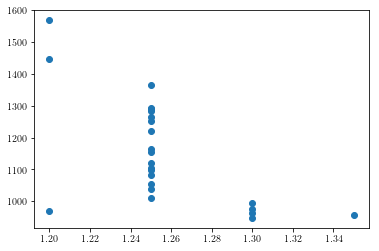

In [209]:
plt.plot(B_max_p,m_p,'o')

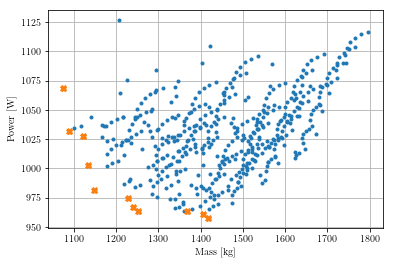

In [188]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(0,2000)
#plt.xlim(420,900)
plt.savefig('Optimum_red_2Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [1151]:
m_700 = m_p
W_700 = W_pa

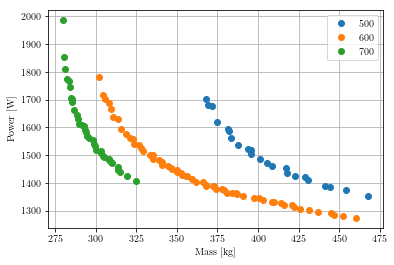

In [1152]:
#plt.plot(m_35,W_35,'o',label = 'Epsilon = 0.35')
#plt.plot(m_45,W_45,'o',label = 'Epsilon = 0.45')
#plt.plot(m_55,W_55,'o',label = 'Epsilon = 0.55')
#plt.plot(m_65,W_65,'o',label = 'Epsilon = 0.55')

plt.plot(m_500,W_500,'o',label = '500')
plt.plot(m_600,W_600,'o',label = '600')
plt.plot(m_700,W_700,'o',label = '700')

#plt.plot(m_2,W_2,'o',label = 'f = 2 Hz')
#plt.plot(m_3,W_3,'o',label = 'f = 3 Hz')
#plt.plot(m_3100,W_3100,'o',label = 'Ret - 1 Hz')
#plt.plot(m_3300,W_3300,'o',label = 'Ret - 1 Hz')

plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend()
plt.grid()
plt.savefig('Freq_Effect.png',format = 'png', dpi=500,bbox_inches='tight')

In [295]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

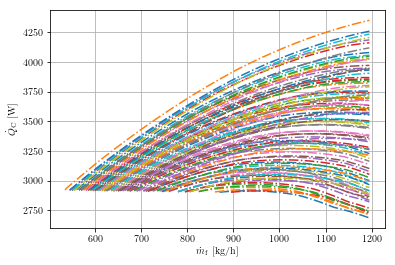

In [296]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'-.')
#plt.ylim(2900,4700)
plt.grid()
#plt.legend()
plt.xlabel(r'$\dot{m}_\mathrm{f}$ [kg/h]')
plt.ylabel(r'$\dot{Q}_\mathrm{C}$ [W]')
plt.savefig('Extra.png',format = 'png', dpi=1000,bbox_inches='tight')

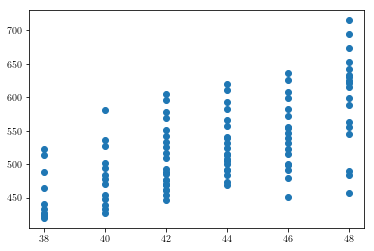

In [488]:
plt.plot(W_p,m_p,'o')

In [1182]:
m_quad = m_p
W_quad = W_pa

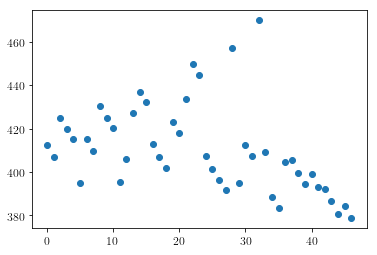

In [1037]:
plt.plot(R4_p,'o')

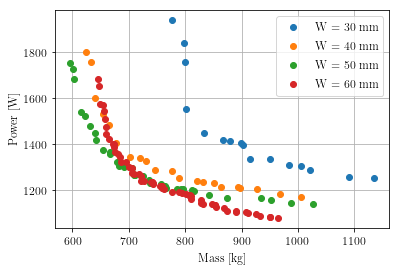

In [926]:
#plt.plot(m_2900,W_2900,'o', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
#plt.plot(m_3100,W_3100,'o', label = '$\dot{Q}_\mathrm{C}$ = 3100 W')
#plt.plot(m_3300,W_3300,'o', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
plt.plot(m_2900_W30,W_2900_W30,'o', label = 'W = 30 mm')
plt.plot(m_2900_W40,W_2900_W40,'o', label = 'W = 40 mm')
plt.plot(m_2900_W50,W_2900_W50,'o', label = 'W = 50 mm')
plt.plot(m_2900_W60,W_2900_W60,'o', label = 'W = 60 mm')
#plt.plot(m_2900_110,W_2900_110,'o', label = 'L = 110 mm')
#plt.plot(m_2900_90,W_2900_90,'o', label = 'L = 90 mm')
#plt.plot(m_2900_80,W_2900_80,'o', label = 'L = 80 mm')
#plt.plot(m_2900_2,W_2900_2,'o', label = 'f = 2 Hz')
#plt.plot(m_2900_4,W_2900_4,'o', label = 'f = 4 Hz')
#plt.plot(m_2900_2,W_2900_2,'x', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
#plt.plot(m_3300_2,W_3300_2,'x', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
#plt.plot(m_3500_2,W_3500_2,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_3,W_3500_3,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_5,W_3500_5,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_10,W_3500_10,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
#plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend()
plt.savefig('Power_W.png',format = 'png', dpi=500,bbox_inches='tight')

In [927]:
plt.plot(m_2900,2900/np.array(W_2900),'o', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
plt.plot(m_3100,3100/np.array(W_3100),'o', label = '$\dot{Q}_\mathrm{C}$ = 3100 W')
plt.plot(m_3300,3300/np.array(W_3300),'o', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
plt.plot(m_3500,3500/np.array(W_3500),'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
#plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('COP [-]')
plt.legend()
plt.savefig('COP_Qc.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'm_2900' is not defined

In [ ]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
#plt.xlim([500,700])
#plt.ylim([1000,2500])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.savefig('Optimum_zoom_1Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
dP_AMR = np.array(W_pump)/(np.array(m_f_target)/3600)*1000

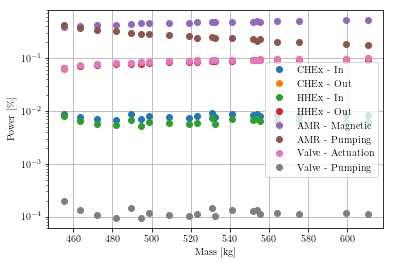

In [154]:
plt.semilogy(m_p,np.array(W_p_CHEx_p)/np.array(W_pa),'o',label = 'CHEx - In')
plt.semilogy(m_p,np.array(W_p_CHEx_f)/np.array(W_pa),'o',label = 'CHEx - Out')
plt.semilogy(m_p,np.array(W_p_HHEx_p)/np.array(W_pa),'o',label = 'HHEx - In')
plt.semilogy(m_p,np.array(W_p_HHEx_f)/np.array(W_pa),'o',label = 'HHEx - Out')
plt.semilogy(m_p,np.array(W_p_mag)/np.array(W_pa),'o',label = 'AMR - Magnetic')
plt.semilogy(m_p,np.array(W_p_pump)/np.array(W_pa),'o',label = 'AMR - Pumping')
plt.semilogy(m_p,np.array(W_pa_valve)/np.array(W_pa),'o',label = 'Valve - Actuation')
plt.semilogy(m_p,np.array(W_pa_p_valve)/np.array(W_pa),'o',label = 'Valve - Pumping')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [$\%$]')
plt.legend()
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [928]:
workbook = xlsxwriter.Workbook('Optimization_results_2900_1Hz_final.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    

workbook.close()

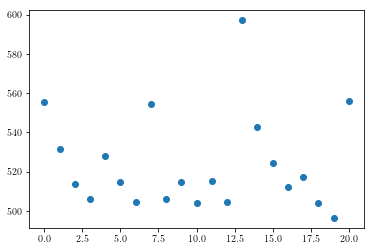

In [248]:
A = W_p_CHEx_f +W_p_CHEx_p
plt.plot(W_p_mag,'o')

In [249]:
W_pa,m_f_p

([1505.9325385702155,
  1408.515993209328,
  1278.6637081335164,
  1255.8963549384393,
  1331.1292882336797,
  1289.7027021715978,
  1257.3387598399604,
  1530.0186769854,
  1271.2489944883948,
  1244.9743944979532,
  1216.0382936285198,
  1255.1840158096345,
  1225.8265617199504,
  1656.4831817162562,
  1421.1363596077822,
  1352.467692969863,
  1311.0767726402098,
  1268.5988694139064,
  1231.6039103485286,
  1211.0831818037402,
  1556.6500786474978],
 [770.0,
  720.0,
  635.0,
  620.0,
  665.0,
  640.0,
  620.0,
  805.0,
  650.0,
  620.0,
  600.0,
  625.0,
  605.0,
  880.0,
  760.0,
  720.0,
  695.0,
  655.0,
  630.0,
  615.0,
  815.0])

In [250]:
len(W_p_valve)

1227

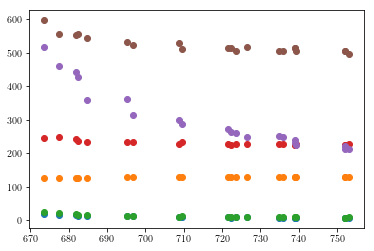

In [251]:
plt.plot(m_p,W_p_CHEx_p,'o')
plt.plot(m_p,W_p_CHEx_f,'o')
plt.plot(m_p,W_p_HHEx_p,'o')
plt.plot(m_p,W_p_HHEx_f,'o')
plt.plot(m_p,W_p_pump,'o')
plt.plot(m_p,W_p_mag,'o')

In [482]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

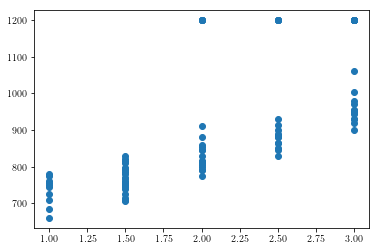

In [522]:
plt.plot(f_p,m_f_p,'o')
plt.savefig('Frequency.png',format = 'png', dpi=500,bbox_inches='tight')

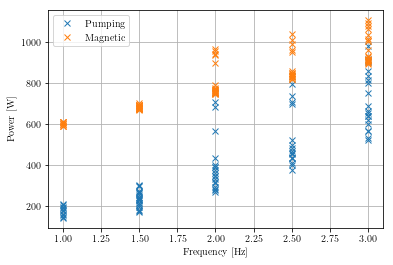

In [521]:
plt.plot(f_p,W_p_pump,'x',label = 'Pumping')
plt.plot(f_p,W_p_mag,'x',label = 'Magnetic')
plt.legend()
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [W]')
plt.savefig('Frequency.png',format = 'png', dpi=500,bbox_inches='tight')

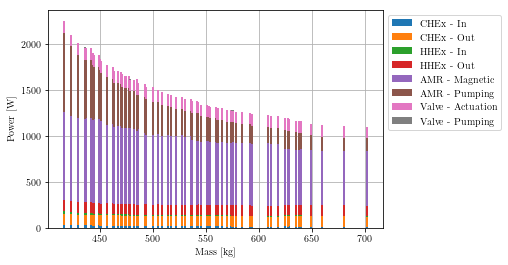

In [509]:
width = 2
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [484]:
m_La = np.pi*(np.array(R3)**2-np.array(R2)**2)*np.array(L_target)*(1-0.45)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+40)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(0.465)*1000*10**-9)

In [485]:
m_La_p = np.pi*(np.array(R3_p)**2-np.array(R2_p)**2)*np.array(L_p)*(1-0.45)*7000*10**-9
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p_10 = np.pi*((np.array(R4_p)+10)**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_20 = np.pi*((np.array(R4_p)+20)**2-(np.array(R4_p)+10)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_40 = np.pi*((np.array(R4_p)+40)**2-(np.array(R4_p)+20)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_80 = np.pi*((np.array(R4_p)+80)**2-(np.array(R4_p)+40)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 

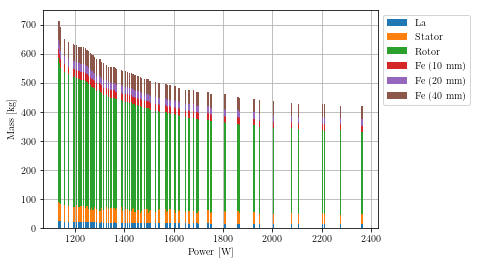

In [486]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p_10, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_20, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10), label = 'Fe (20 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_40, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20), label = 'Fe (40 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

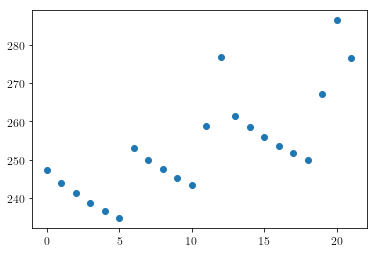

In [1591]:
plt.plot(R4_p,'o')

In [484]:
m_p,W_pa

([367.402400861069,
  398.345315962042,
  372.8456526475824,
  402.40845718959457,
  433.830910242989,
  467.02856121440635,
  382.8696921207481,
  387.6283174724972,
  410.5044001166666,
  440.2885452611251,
  472.0598790129393,
  505.7040746062123,
  400.2483965202077,
  423.9106349157607,
  451.37742090347405,
  481.2053589737194,
  477.6182089834999,
  466.057065809478,
  484.53539684062144,
  550.3606815764064],
 [1396.2981884921105,
  1067.4647171932024,
  1144.6335372320443,
  962.0860495912351,
  868.9929801223235,
  807.1608771280028,
  1098.4567484250542,
  1077.1504704109616,
  925.5806000591259,
  827.8488879621299,
  796.8268121007104,
  791.5180958874895,
  1062.7096565075608,
  914.3054675665245,
  817.6301261699194,
  791.6362740539375,
  nan,
  nan,
  nan,
  nan])

In [435]:
len(W_pa)

18

ValueError: x and y must have same first dimension, but have shapes (670,) and (216, 1)

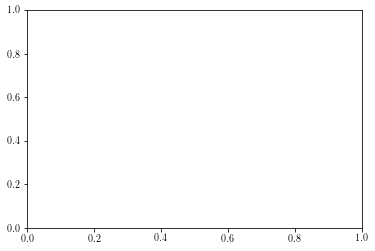

In [44]:
erro_Qc = np.arange(-100,250)
plt.plot(Q_c,np.array(Qc_rg)/16,'o')
plt.plot(erro_Qc,1.1*erro_Qc,'k--')
plt.plot(erro_Qc,0.9*erro_Qc,'k--')
plt.grid()
plt.ylabel('Analytical Cooling Capacity [W]')
plt.xlabel('Numerical Cooling Capacity [W]')
plt.xlim(100,250)
plt.ylim(100,250)
plt.savefig('Qc_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Qh = np.arange(-100,350)
plt.plot(Q_h,np.array(Qh_rg)/16,'o')
plt.plot(erro_Qh,1.1*erro_Qh,'k--')
plt.plot(erro_Qh,0.9*erro_Qh,'k--')
plt.grid()
plt.ylabel('Analytical Rejected Heat [W]')
plt.xlabel('Numerical Rejected Heat [W]')
plt.xlim(120,300)
plt.ylim(120,300)
plt.savefig('Qh_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Wp = np.arange(0,25)
plt.plot(W_p,W_pump_rg,'o')

plt.plot(erro_Wp,1.1*erro_Wp,'k--')
plt.plot(erro_Wp,0.9*erro_Wp,'k--')
plt.grid()
plt.ylabel('Analytical Pumping Power [W]')
plt.xlabel('Numerical Pumping Power [W]')
#plt.xlim(120,300)
#plt.ylim(120,300)

### Closure Relations

In [ ]:
plt.plot(N_r,R4,'o')

In [ ]:
plt.plot(H,np.array(R3)-np.array(R2),'o')

Regenerator arranges